# Numerical Integration

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Visualizing Riemann Sums

The definite integral $\int_a^b f(x) \, dx$ is the (net) area under the curve $y=f(x)$. Approximate the area under the curve by the sum of areas of rectangles. In particular, choose an integer $N$ and define

$$
x_k = a + k \Delta x \ \ \ , \ \ \Delta x = \frac{b - a}{N} \ \ \ , \ \ k=0,1,\dots,N
$$

The values $x_0,x_1,\dots,x_N$ define a partition of the interval $[a,b]$ with $N$ subintervals. Note that $x_0 = a$ and $x_N = b$. Define a rectangle over each subinterval $[x_{k-1},x_k]$, $k=1,\dots,N$, with height using the right endpoint $f(x_k)$ or the left endpoint $f(x_{k-1})$. Using the right endpoint we get the **right Riemann sum**

$$
R = \sum_{k=1}^N f(x_k) \Delta x = \left( \frac{b-a}{N} \right) \sum_{k=1}^N f(x_k)
$$

Using the left endpoint we get the **left Riemann sum**

$$
L = \sum_{k=1}^N f(x_{k-1}) \Delta x = \left( \frac{b-a}{N} \right) \sum_{k=1}^N f(x_{k-1})
$$

Each Riemann sum is an approximation of the definite integral $\int_a^b f(x) \, dx$. The definite integral is equal to the limit

$$
\int_a^b f(x) \, dx = \lim_{N \to \infty} \sum_{k=1}^N f(x_k^*) \Delta x
$$

where $x_k^*$ is any value in the interval $[x_{k-1},x_k]$.

Let's visualize the area under curve approximated by rectangles. Consider the function $f(x) = 1-x^2$ over the interval $[0,1]$ and plot rectangles for the left Riemann sum.

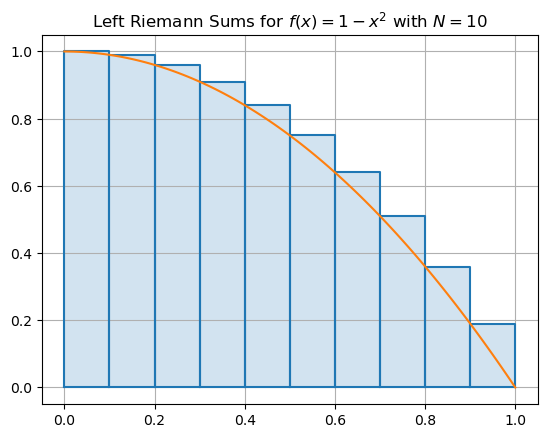

In [5]:
# Define the function
f = lambda x: 1 - x**2

# Define the partition of [a,b] consisting of N subintervals of equal length
a = 0; b = 1; N = 10; dx = (b - a)/N;
x = np.linspace(a,b,N+1)

# Compute the y values at each point x[k] in the partition
y = f(x)

# Plot a rectangle for each subinterval [x[k-1],x[k]]
for k in range(1,N+1):
    
    # Plot a filled rectangle with base from x[k-1] to x[k] and height y[k-1]
    plt.fill([x[k-1],x[k-1],x[k],x[k]],[0,y[k-1],y[k-1],0],'C0',alpha=0.2)
    
    # Plot the outline of the rectangle with base from x[k-1] to x[k] and height y[k-1]
    plt.plot([x[k-1],x[k-1],x[k],x[k],x[k-1]],[0,y[k-1],y[k-1],0,0],'C0')

# Compute many values y = f(x) so that we can plot y = f(x) smoothly
X = np.linspace(a,b,(b-a)*100)
Y = f(X)
plt.plot(X,Y,'C1')

# Add style to the figure
plt.grid(True)
plt.title('Left Riemann Sums for $f(x) = 1-x^2$ with $N={}$'.format(N))
plt.show()

Let's do the same example but for right Riemann sums.

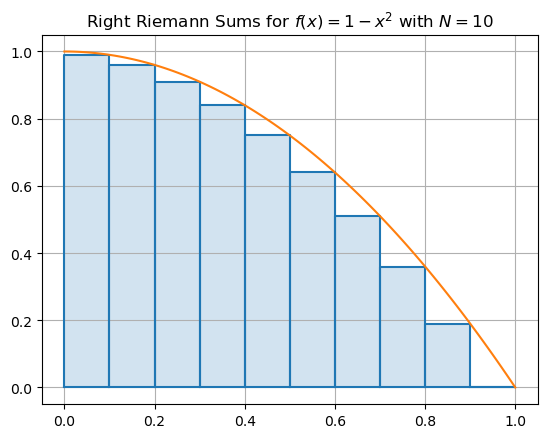

In [6]:
# Define the function
f = lambda x: 1 - x**2

# Define the partition of [a,b] consisting of N subintervals of equal length
a = 0; b = 1; N = 10; dx = (b - a)/N;
x = np.linspace(a,b,N+1)

# Compute the y values at each point x[k] in the partition
y = f(x)

# Plot a rectangle for each subinterval [x[k-1],x[k]]
for k in range(1,N+1):
    
    # Plot a filled rectangle with base from x[k-1] to x[k] and height y[k]
    plt.fill([x[k-1],x[k-1],x[k],x[k]],[0,y[k],y[k],0],'C0',alpha=0.2)
    
    # Plot the outline of the rectangle with base from x[k-1] to x[k] and height y[k]
    plt.plot([x[k-1],x[k-1],x[k],x[k],x[k-1]],[0,y[k],y[k],0,0],'C0')

# Compute many values y = f(x) so that we can plot y = f(x) smoothly
X = np.linspace(a,b,(b-a)*100)
Y = f(X)
plt.plot(X,Y,'C1')

# Add style to the figure
plt.grid(True)
plt.title('Right Riemann Sums for $f(x) = 1-x^2$ with $N={}$'.format(N))
plt.show()

## Computing Riemann Sums

The right Riemann for the definite integral $\int_a^b f(x) dx$ is given by

$$
R = \left( \frac{b - a}{N} \right) \sum_{k=1}^N y_k
$$

where $y_k = f(x_k)$ is the value at the right endpoint of the interval $[x_{k-1},x_k]$ for each $k=1,\dots,N$.

The procedure to compute the right Riemann sum is as follows:

1. Define the function $y = f(x)$ and limits of integration $a$ and $b$
2. Choose a value $N$ and compute the value $\Delta x = (b - a)/N$
3. Use `np.linspace` to create the vector of $x$ values in the partition
4. Use vectorization to compute the vector of $y$ values
5. Compute the sum of the $y$ values from index $k=1$ to $k=N$ and multiply by $\Delta x$

Let's do the example from the previous exercise $\int_0^1 (1 - x^2) \, dx$. We know the exact value is $2/3$ and so we can compare our results. First, define the function $f(x)$:

In [7]:
f = lambda x: 1 - x**2
a = 0
b = 1

Choose a value $N$. This is entirely up to us. Higher value $N$ gives a better approximation but requires more memory and time to compute the sum. Let's start small and then increase it later.

In [8]:
N = 5
dx = (b - a)/N

Compute the vector $\mathbf{x}$ given by the values $x_k = a + k \Delta x$, $k=0,1,\dots,N$. Note that there are $N+1$ values in the vector $\mathbf{x}$.

In [9]:
x = np.linspace(a,b,N+1)

Print the vector to verify:

In [10]:
print(x)

[0.  0.2 0.4 0.6 0.8 1. ]


Apply the function $f(x)$ to the vector $\mathbf{x}$. The result is the vector

$$
\mathbf{y} = f(\mathbf{x}) = \begin{bmatrix} f(x_0) & f(x_1) & \cdots & f(x_N) \end{bmatrix}
$$

In other words, the value of $\mathbf{y}$ at in dex $k$ is $y_k = f(x_k)$.

In [11]:
y = f(x)

Print the vector to verify:

In [12]:
print(y)

[1.   0.96 0.84 0.64 0.36 0.  ]


Select the values of `y` from index 1 to N using the command:

In [13]:
y[1:]

array([0.96, 0.84, 0.64, 0.36, 0.  ])

Approximate the integral using the right Riemann sums:

In [14]:
R = np.sum(y[1:])*(b - a)/N
print(R)

0.5599999999999998


Let's put it all together in one cell and then increase $N$ to get better approximations:

In [15]:
f = lambda x: 1 - x**2
a = 0; b = 1; N = 20; dx = (b - a)/N;
x = np.linspace(a,b,N+1)
y = f(x)
R = np.sum(y[1:])*(b - a)/N
print(R)

0.64125


The left Riemann for the definite integral $\int_a^b f(x) dx$ is given by

$$
L = \left( \frac{b - a}{N} \right) \sum_{k=1}^N y_{k-1}
$$

where $y_{k-1} = f(x_{k-1})$ is the value at the left endpoint of the interval $[x_{k-1},x_k]$ for each $k=1,\dots,N$.

Note that we can make the substitution in the index $k - 1 \to k$ to rewrite the sum as

$$
L = \left( \frac{b - a}{N} \right) \sum_{k=0}^{N-1} y_k
$$

The procedure to compute the left Riemann sum is exactly the same but this time we need to select the values of the vector `y` from index 0 to N-1.

In [16]:
f = lambda x: 1 - x**2
a = 0; b = 1; N = 5; dx = (b - a)/N;
x = np.linspace(a,b,N+1)
y = f(x)
print(y)

[1.   0.96 0.84 0.64 0.36 0.  ]


Select the values of `y` from index 0 to N-1 using the command:

In [17]:
y[:N]

array([1.  , 0.96, 0.84, 0.64, 0.36])

Approximate the integral using the left Riemann sums:

In [18]:
f = lambda x: 1 - x**2
a = 0; b = 1; N = 20; dx = (b - a)/N;
x = np.linspace(a,b,N+1)
y = f(x)
L = np.sum(y[:N])*(b - a)/N
print(L)

0.6912499999999999


We know that $\int_0^1 (1 - x^2) \, dx = 2/3$ therefore the Riemann sums approach $2/3$ as $N \to \infty$.

## Computing the Trapezoid Rule

The left and right Riemann sums are approximations of the definite integral $\int_a^b f(x) \, dx$. The **trapezoid rule** is the average of the left and right Riemann sums

$$
T = \frac{L + R}{2} = \frac{1}{2} \left( \sum_{k=1}^N f(x_{k-1}) \Delta x + \sum_{k=1}^N f(x_k) \Delta x \right)
= \left( \frac{b-a}{N} \right) \sum_{k=1}^N \left( \frac{f(x_{k-1}) + f(x_k)}{2} \right)
$$

The trapezoid rule corresponds to the sum of the areas of the trapezoids below the curve on each subinterval.

For example, let's plot the trapezoids for $f(x) = 1-x^4$ in the interval $[-1,1]$ for $N=5$.

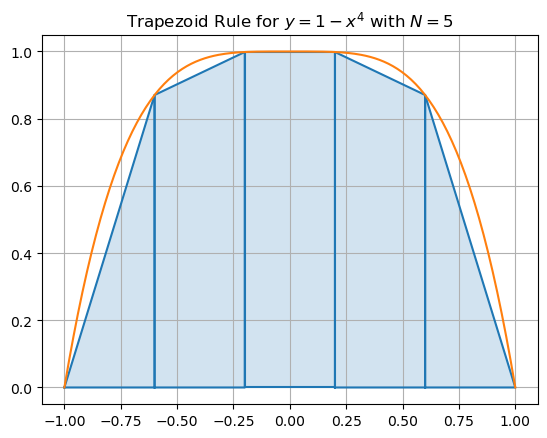

In [19]:
f = lambda x: 1 - x**4
a = -1; b = 1; N = 5;
x = np.linspace(a,b,N+1)
y = f(x)

# Plot a rectangle for each subinterval [x[k-1],x[k]]
for k in range(1,N+1):
    
    # Plot a filled trapezoid with base from x[k-1] to x[k] and height y[k]
    plt.fill([x[k-1],x[k-1],x[k],x[k]],[0,y[k-1],y[k],0],'C0',alpha=0.2)
    
    # Plot the outline of the rectangle with base from x[k-1] to x[k] and height y[k]
    plt.plot([x[k-1],x[k-1],x[k],x[k],x[k-1]],[0,y[k-1],y[k],0,0],'C0')

# Compute many values y = f(x) so that we can plot y = f(x) smoothly
X = np.linspace(a,b,(b-a)*100)
Y = f(X)
plt.plot(X,Y,'C1')

# Add style to the figure
plt.grid(True)
plt.title('Trapezoid Rule for $y = 1-x^4$ with $N={}$'.format(N))
plt.show()

Let's compute the average of the left and right Riemann sums:

In [20]:
f = lambda x: 1 - x**4
a = -1; b = 1; N = 100;
x = np.linspace(a,b,N+1)
y = f(x)
T = (b - a)/N*(np.sum(y[1:] + y[:N]))/2
print('T =',T)

T = 1.5997333440000003


The exact solution is $\int_{-1}^1 (1 - x^4) \, dx = 8/5$ therefore $T$ converges to $1.6$ as $N \to \infty$.

## Visualizing Riemann Sums for Double Integrals

Let $R$ be the region bounded between the curves $y = B(x)$ and $y = T(x)$ and $a \leq x \leq b$. Let $f(x,y)$ be an integrable function. The **definite integral** of $f(x,y)$ over the region $R$ is a limit of Riemann sums

$$
\iint_R f(x,y) \, dy dx = \int_a^b \int_{B(x)}^{T(x)} f(x,y) \, dy \, dx = \lim_{N \to \infty} \sum_{k=1}^N \left( \int_{B(x_k)}^{T(x_k)} f(x_k,y) dy \right) \Delta x
= \lim_{N,M \to \infty} \sum_{k=1}^N \sum_{l=1}^M f(x_k,y_{kl}) \Delta y_k \Delta x
$$

where

$$
x_k = a + k \Delta x \ \ \ , \ \ k = 1,\dots,N \ \ \ , \ \ \Delta x = \frac{b - a}{N}
$$

and

$$
y_{kl} = B(x_k) + l \Delta y_k \ \ \ , \ \ k = 1,\dots,N \ \ \ , \ \ l = 1,\dots,M \ \ \ , \ \ \Delta y_k = \frac{T(x_k) - B(x_k)}{M}
$$

Note that $x_0=a$ and $x_N=b$, and $y_{k,0},y_{k,1},\dots,y_{k,M}$ is a partition of $[B(x_k),T(x_k)]$ for each $k=1,\dots,N$.

What does any of this mean?!!!

Let's plot all the points $(x_k,y_{kl}) \in \mathbb{R}^2$ for $k=0,\dots,N$ and $l=0,\dots,M$ for the area bounded by the curves $T(x) = 1 + \sqrt{x}$ and $B(x) = x^2$ for $0 \leq x \leq 1$. 

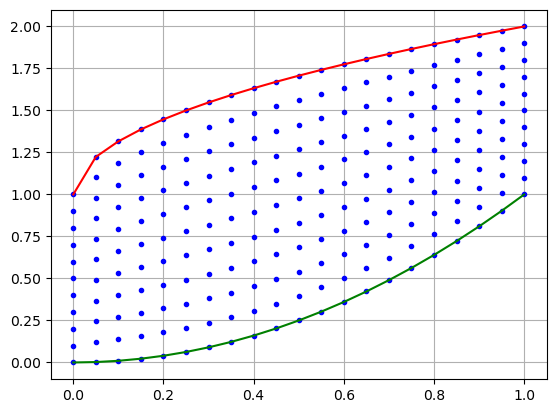

In [21]:
T = lambda x: 1 + np.sqrt(x)
B = lambda x: x**2

N = 20;
x = np.linspace(0,1,N+1)

for k in range(N+1):
    M = 10
    y = np.linspace(B(x[k]),T(x[k]),M+1)
    for l in range(M+1):
        plt.plot(x[k],y[l],'b.')

plt.plot(x,T(x),'r'), plt.plot(x,B(x),'g')
plt.grid(True)
plt.show()

Now we can see all the points when we partition the $x$-interval $[a,b]$ and then partition each $y$-interval $[B(x_k),T(x_k)]$ for $k=1,\dots,N$.

A Riemann sum is of the form

$$
\iint_R f(x,y) \, dy dx = \int_a^b \int_{B(x)}^{T(x)} f(x,y) \, dy \, dx \approx \sum_{k=1}^N \sum_{l=1}^M f(x_k^*,y_{kl}^*) \Delta y_k \Delta x
$$

where $x_k^* \in [x_{k-1},x_k]$ and $y_{kl}^* \in [y_{k,l-1},y_{k,l}]$. The right Riemann sum is when we choose the right endpoints $x_k^* = x_k$ and $y_{kl}^* = y_{kl}$.

The value $f(x_k^*,y_{kl}^*) \Delta y_k \Delta x$ is the volume of a rectangular prism of height $f(x_k^*,y_{kl}^*)$ and base $\Delta y_k \Delta x$. Let's use color to show the value $f(x,y)$.

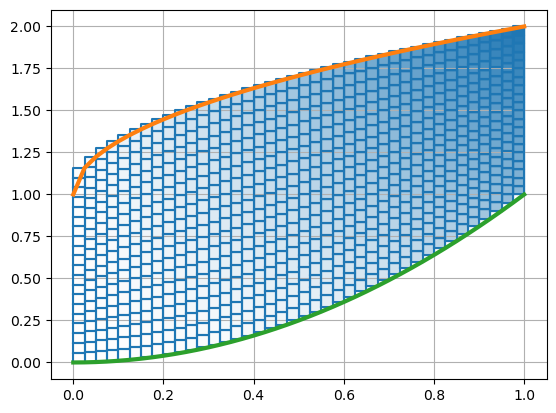

In [22]:
f = lambda x,y: x*y

a = 0; b = 1;
T = lambda x: 1 + np.sqrt(x)
B = lambda x: x**2

maxf = 2 # Maximum value of f(x,y) in the region.
# We use this for the transparancy alpha=z/maxf of each rectangle

N = 40
x = np.linspace(a,b,N+1)

for k in range(1,N+1):
    M = 20
    y = np.linspace(B(x[k]),T(x[k]),M+1)
    for l in range(1,M+1):
        z = f(x[k],y[l])
        plt.fill([x[k-1],x[k-1],x[k],x[k],x[k-1]],[y[l-1],y[l],y[l],y[l-1],y[l-1]],c='C0',alpha=z/maxf)
        plt.plot([x[k-1],x[k-1],x[k],x[k],x[k-1]],[y[l-1],y[l],y[l],y[l-1],y[l-1]],'C0')

plt.plot(x,T(x),'C1',lw=3), plt.plot(x,B(x),'C2',lw=3)
plt.grid(True)
plt.show()

## Computing Riemann Sums for Double Integrals

The procedure to compute the right Riemann sum for a double integral is as follows:

1. Define the function $z = f(x,y)$ and limits of integration $a$ and $b$, and $y=B(x)$ and $y = T(x)$.
2. Choose an integer $N$ and compute the value $\Delta x = \frac{b-a}{N}$
3. Use `np.linspace` to compute the vector of $x$ values in the partition of $[a,b]$: $x_k = a + k \Delta x$
4. For each subinterval $[x_{k-1},x_k]$, $k=1,\dots,N$, approximate the definite integral $\int_{B(x_k)}^{T(x_k)} f(x_k,y) \, dy$:
   1. Choose an integer $M$ and compute the value $\Delta y_k = \frac{T(x_k)-B(x_k)}{M}$.
   2. USe `np.linspace` to create the vector of $y$ values in the partition of $[B(x_k),T(x_k)]$: $y_{kl} = B(x_k) + l \Delta y_k$
   3. Compute the vector of values $f(x_k,y_{lk})$
   4. Compute and save the sum $I_k = \sum_{l = 1}^M f(x_k,y_{kl}) \Delta y_k$
3. Approximate the double integral by a sum of Riemann sums

$$
\iint_R f(x,y) \, dy dx = \int_a^b \int_{B(x)}^{T(x)} f(x,y) \, dy \, dx \approx \sum_{k=1}^N \left( \int_{B(x_k)}^{T(x_k)} f(x_k,y) dy \right) \Delta x
\approx \sum_{k=1}^N I_k \Delta x
\approx \sum_{k=1}^N \sum_{l=1}^M f(x_k,y_{kl}) \Delta y_k \Delta x
$$

In [23]:
f = lambda x,y: x*y
a = 0; b = 1;
T = lambda x: 1 + np.sqrt(x)
B = lambda x: x**2

N = 1000;
x = np.linspace(a,b,N+1)
dx = (b - a)/N

I = 0
for k in range(1,N+1):
    M = 1000
    y = np.linspace(B(x[k]),T(x[k]),M+1)
    dy = (T(x[k]) - B(x[k]))/M
    fk = f(x[k],y[1:])
    I = I + np.sum(fk)*dx*dy

print(I)

0.7345113601794344


The exact value of the integral is:

$$
\int_0^1 \int_{x^2}^{1 + \sqrt{x}} xy \, dy dx
= \frac{1}{2} \int_0^1 x \left( 1 + 2\sqrt{x} + x - x^4 \right) \, dx
= \frac{1}{2} \left( (1/2)x^2 + (4/5)x^{5/2} + (1/3)x^3 - (1/6)x^6 \right)_0^1
= \frac{11}{15}
$$

In [24]:
11/15

0.7333333333333333

## Trapezoid Rule for Double Integrals

In our code above, we use the right endpoints of the intervals $[x_{k-1},x_k]$ and $[y_{k,l-1},y_{k,l}]$, $l=1,\dots,M$, when we compute the value:

```
    fk = f(x[k],y[1:])
```

Since we can choose right or left endpoints in both the $x$ and $y$ directoin there are 4 different choices:

```
    fk1 = f(x[k],y[1:])
    fk2 = f(x[k-1],y[1:])
    fk3 = f(x[k],y[:N])
    fk4 = f(x[k-1],y[:N])
```

The **trapezoid rule** is when we use the average of these 4 computations to approximate the double integral.

## Triple Integrals

*Under construction*